In [193]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pathlib
import os

import pathlib
pathlib.Path().resolve()
os.chdir('C:/Users/thanh_cv54t9u/')

# Config plot
matplotlib.rcParams['figure.figsize'] = (16, 7.5)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

## 1. Load data

In [194]:
train = pd.read_csv('Notebook/csv/Sevilla/train.csv')
test = pd.read_csv('Notebook/csv/Sevilla/test.csv')

In [195]:
print("Train size: ", train.shape)
print("Test size: ", test.shape)

Train size:  (20453, 800)
Test size:  (8774, 799)


In [196]:
train.head()

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,1,13,7.0,winner,team1,8,7.0,7.0,0.317073,0.48,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,3,16,6.5,loser,team2,8,3.0,9.0,0.463415,0.42,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,4,8.5,loser,team1,5,11.0,11.0,0.682927,0.44,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,5,13,8.0,loser,team2,4,17.0,17.0,0.682927,0.58,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,7,11,3.5,draw,team1,5,10.0,10.0,0.731707,0.70,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500


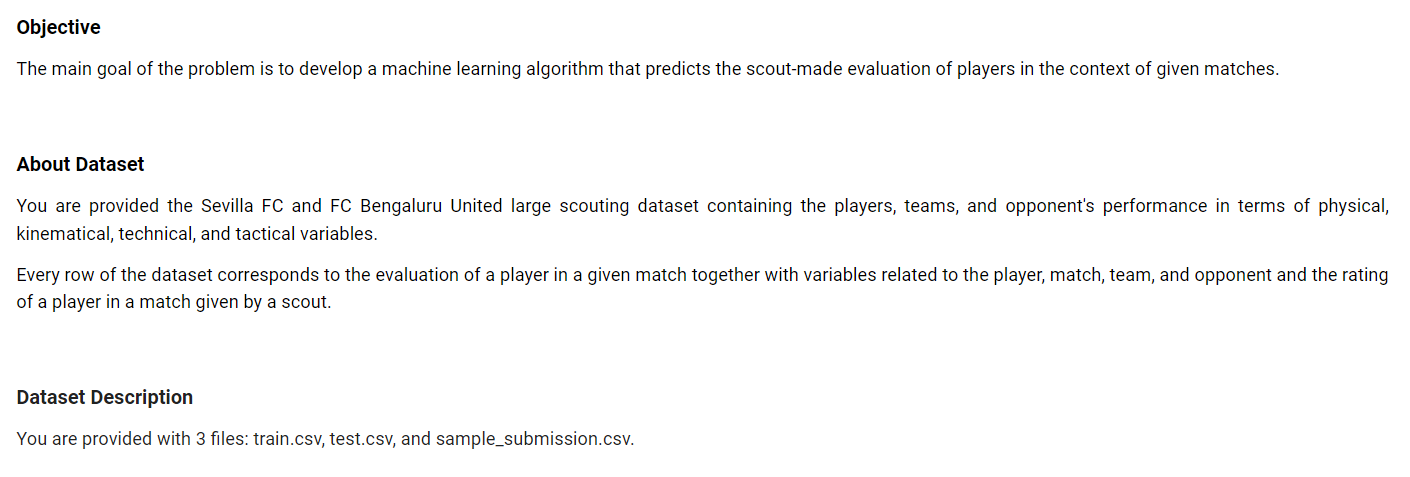

In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20453 entries, 0 to 20452
Columns: 800 entries, row_id to team2_offensive_derived_var_19
dtypes: float64(794), int64(4), object(2)
memory usage: 124.8+ MB


> ## Variables description

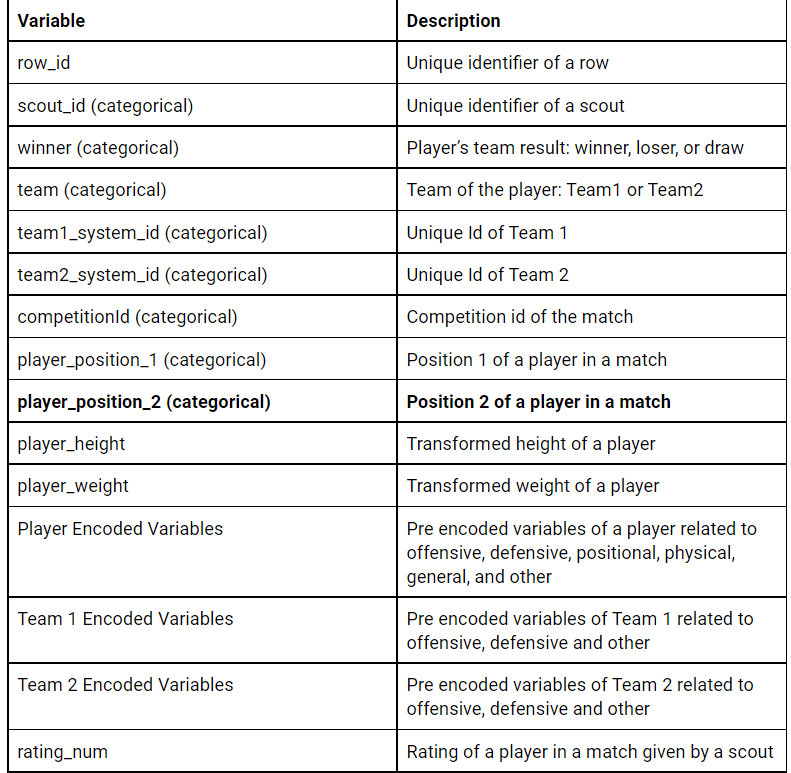

# 2. Clean data

> Set index to Row_id

In [198]:
train = train.set_index("row_id")
test = test.set_index("row_id")

> Are null values?

In [199]:
# Show null values of **rating_num**
train["rating_num"].isnull().any()

False

<AxesSubplot:>

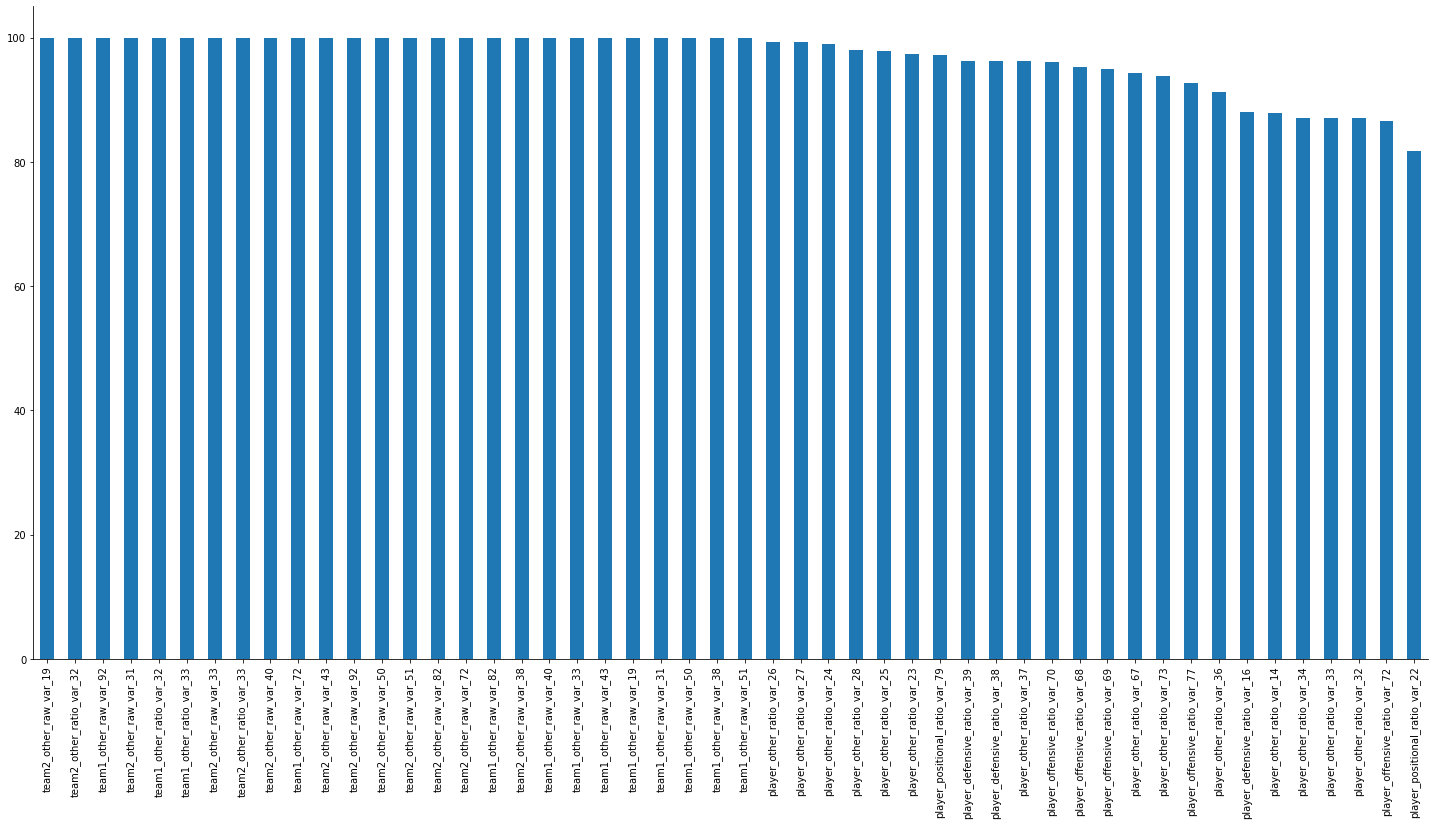

In [200]:
fig = plt.figure(figsize=(25,12))
# Null values of feature vars
s = train.isnull().sum()

# Calculate pct of null values
s = s / len(train) * 100
s = s.sort_values(ascending=False).round(2)

# plot 50 field which have highest pct of null values
s[:50].plot(kind="bar")

- Notice that many fields like "team1_other_raw_var_31", "team1_other_raw_var_40" have **all null values** or **have a very high rate of null values (> 90%)** , we need to drop them!

In [201]:
# Before
print("Train size: ", train.shape)
print("Test size: ", test.shape)

Train size:  (20453, 799)
Test size:  (8774, 798)


In [202]:
to_drop = s[s>90].index.values
# Drop
train = train.drop(columns=to_drop)
test = test.drop(columns=to_drop)

In [203]:
# Check the size after
print("Train size: ", train.shape)
print("Test size: ", test.shape)

Train size:  (20453, 756)
Test size:  (8774, 755)


In [204]:
print(len(to_drop))

43


-> Roughly 40 fileds have been dropped after this step!

In [205]:
#print(to_drop)

# 3. Explore Data

> ### 3.1 Target variable - rating_num

Text(0.5, 1.0, 'Count plot of rating_num')

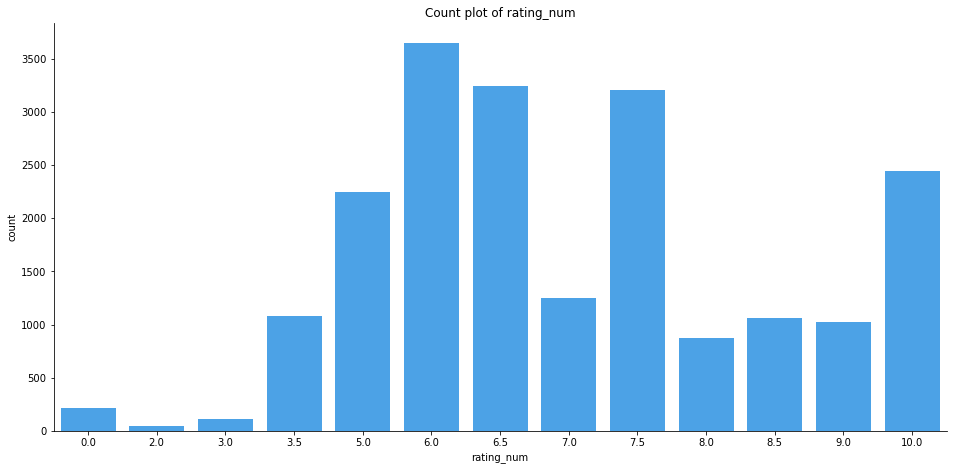

In [206]:
sns.countplot(data=train, x="rating_num", color="#33A5FF")
plt.title("Count plot of rating_num")

> ### 3.2 Categorical variables

In [207]:
features = train.drop("rating_num", axis=1).columns.values

categorical_vars = ["scout_id", "winner", "competitionId",
                    "team", "team1_system_id", "team2_system_id",
                    "player_position_1", "player_position_2"
                   ]

In [208]:
train.groupby(by=["winner"])["rating_num"].mean().reset_index()

,winner,rating_num
0,draw,6.904094
1,loser,6.431233
2,winner,7.213509


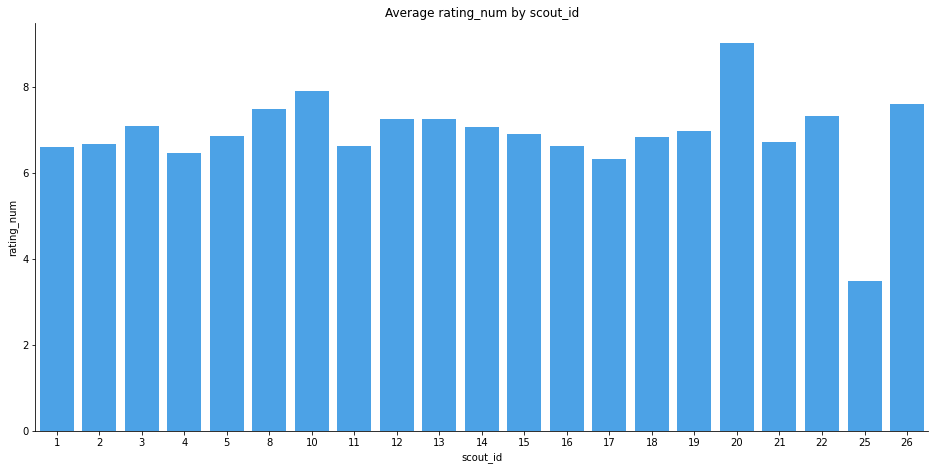

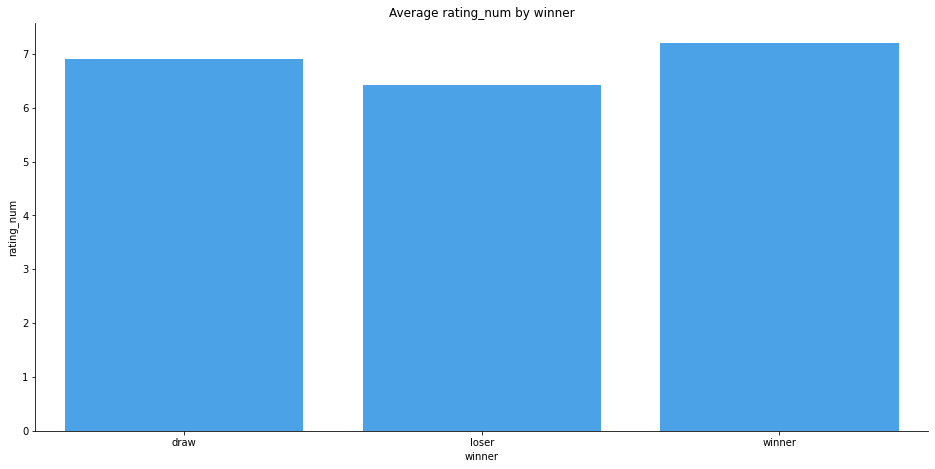

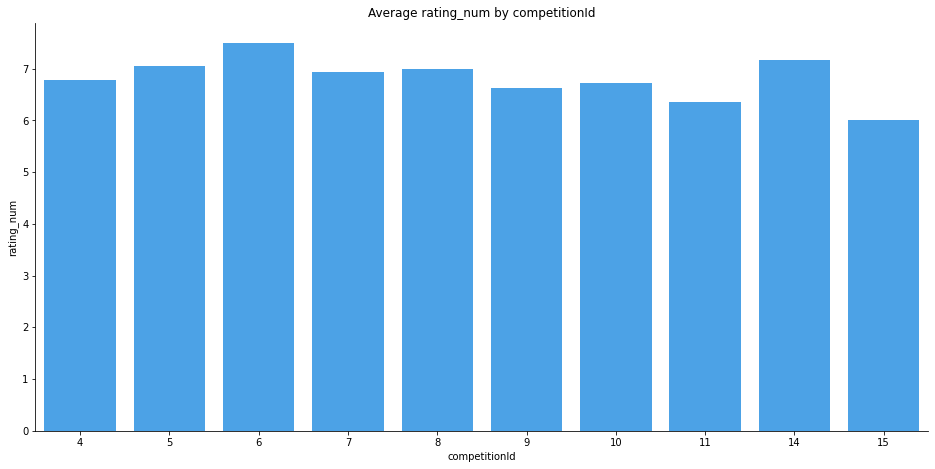

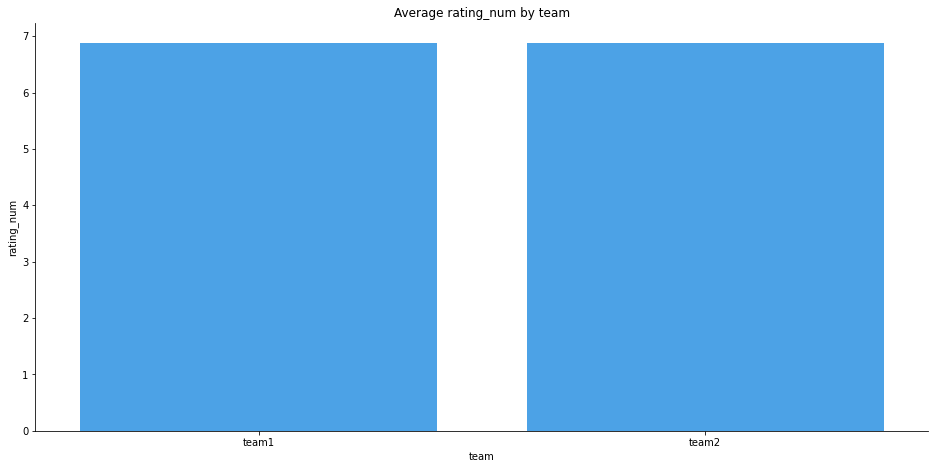

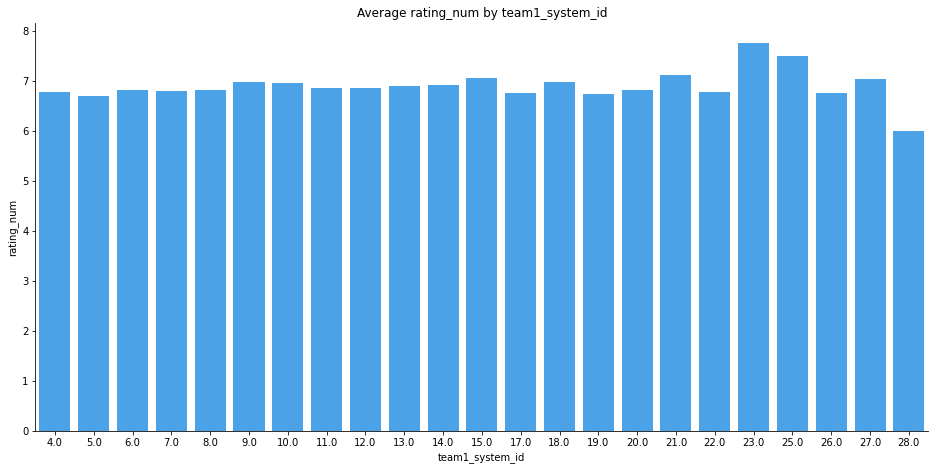

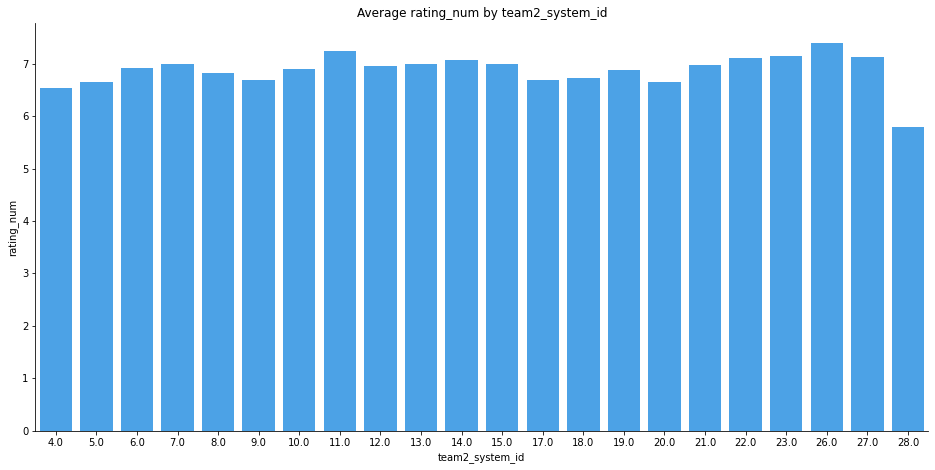

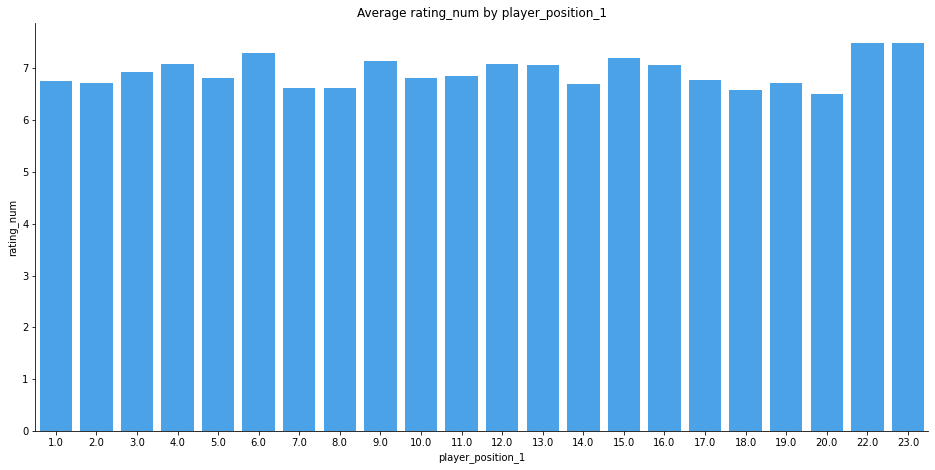

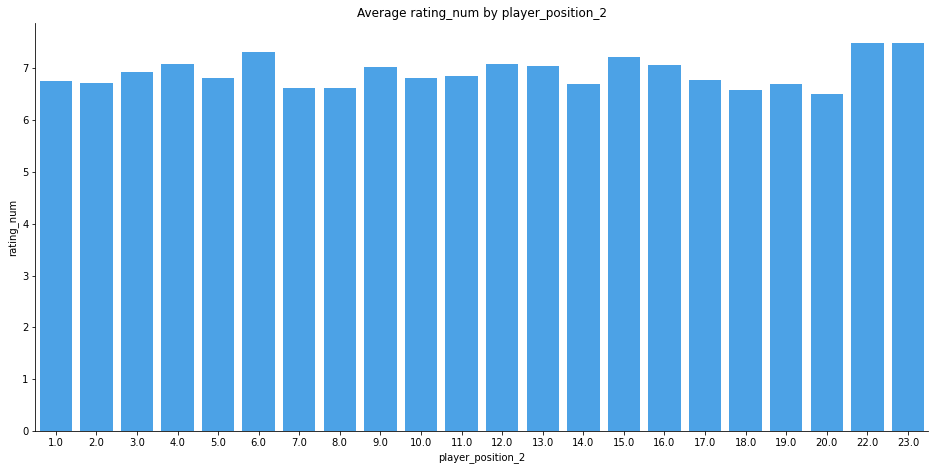

In [209]:
for i in categorical_vars:
    gr=train.groupby(by=i)["rating_num"].mean().reset_index()
    sns.barplot(data=gr, x=i, y="rating_num", color="#33A5FF")
    plt.title("Average rating_num by "+i)
    plt.xticks(rotation=0)
    plt.show()

> ### 3.3 Numerical variables

In [210]:
train.describe().round(2)

,scout_id,rating_num,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
count,20453.00,20453.00,20453.00,20378.00,20378.00,20451.00,20451.00,20453.00,20453.00,20453.00,...,19026.00,20332.00,19019.00,19021.00,19026.00,19026.00,19026.00,19026.00,19026.00,19026.00
mean,10.02,6.89,7.31,7.61,8.01,0.50,0.46,0.03,0.00,0.09,...,0.35,0.18,0.25,0.58,0.48,0.50,0.11,0.42,0.42,0.33
std,5.71,1.85,2.35,5.06,4.91,0.16,0.14,0.08,0.06,0.23,...,0.14,0.06,0.14,0.15,0.16,0.14,0.06,0.10,0.12,0.14
min,1.00,0.00,4.00,1.00,1.00,0.02,0.04,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.04,0.00,0.00
25%,3.00,6.00,5.00,3.00,3.00,0.39,0.34,0.00,0.00,0.00,...,0.25,0.16,0.15,0.49,0.37,0.41,0.07,0.36,0.33,0.24
50%,12.00,6.50,7.00,7.00,8.00,0.51,0.44,0.00,0.00,0.00,...,0.34,0.18,0.24,0.59,0.48,0.50,0.10,0.42,0.42,0.32
75%,15.00,8.00,9.00,11.00,11.00,0.61,0.54,0.00,0.00,0.00,...,0.43,0.22,0.34,0.69,0.60,0.59,0.15,0.49,0.51,0.43
max,26.00,10.00,15.00,23.00,23.00,0.98,1.00,1.00,1.00,0.98,...,0.96,1.00,1.00,1.00,0.99,0.98,1.00,1.00,1.00,1.00


-> Almost all features are **normalized to range(0,1)** (based on the min value and max value of each features) 

<AxesSubplot:xlabel='player_weight', ylabel='player_height'>

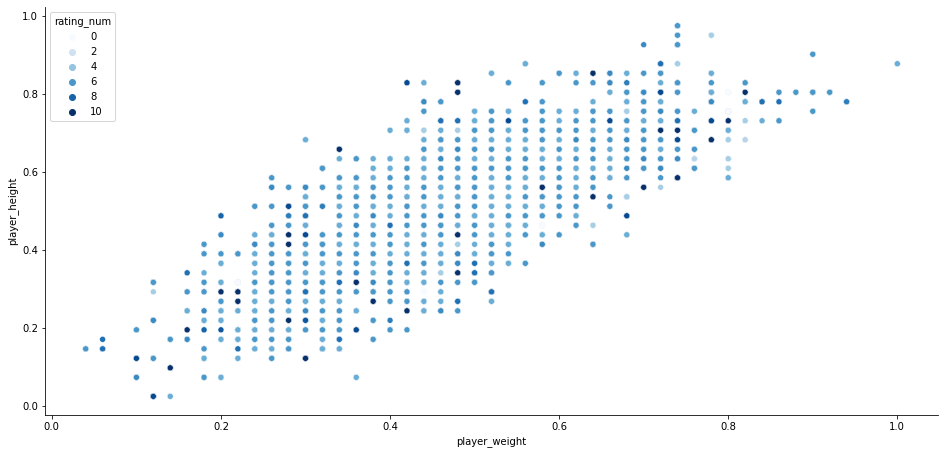

In [211]:
# Height & weight by rating_num?
sns.scatterplot(data=train, x="player_weight", y="player_height", hue="rating_num",
                palette = sns.color_palette("Blues", as_cmap=True)
)

In [212]:
numerical_vars = features[~np.isin(features, categorical_vars)].tolist()

**Variables that encode player properties or performance** are grouped according to the following scheme:    
  
player_(offensive/defensive/positional/physical/general/other)_(derived/raw/ratio)_var_#number  

player shows if the variable refers to a player property  
(offensive/defensive/positional/physical/general/other) refers to the nature of the variable  
(derived/raw/ratio):  
raw: variable empirically measured  
derived: variable defined based on two or more variables and not empirically measured  
ratio: variable defined as a ratio of two raw variables  

**Variables that encode team properties or performance** are grouped according to the following scheme:  

team(1/2)_(offensive/defensive/other)_(derived/raw/ratio)_var_#number  

team(1/2) shows if the variable refers to a team1 or team2 property  
(offensive/defensive/other) refers to the nature of the variable  
(derived/raw/ratio):  
raw: variable empirically measured  
derived: variable defined based on two or more variables and not empirically measured   
ratio: variable defined as a ratio of two raw variables   

#### New features
I'm trying to create some new features by apply **np.sum** among each specific group of features..

> ### 3.3.1 - Player properties and performance 

In [213]:
player_vars = list(filter(lambda v: re.match('player_', v), numerical_vars))

In [214]:
# Properties
player_offensive = list(filter(lambda v: re.search("_offensive", v), player_vars))
player_defensive = list(filter(lambda v: re.search("_defensive", v), player_vars))
player_positional = list(filter(lambda v: re.search("_positional", v), player_vars))
player_physical = list(filter(lambda v: re.search("_physical", v), player_vars))
player_general = list(filter(lambda v: re.search("_general", v), player_vars))
player_other = list(filter(lambda v: re.search("_other", v), player_vars))

player_raw = list(filter(lambda v: re.search("_raw", v), player_vars))
player_derived = list(filter(lambda v: re.search("_derived", v), player_vars))
player_ratio = list(filter(lambda v: re.search("_ratio", v), player_vars))

In [215]:
print(len(player_offensive), len(player_defensive), len(player_positional), len(player_physical),
      len(player_general), len(player_other))

print(len(player_raw), len(player_derived),len(player_ratio))

96 72 40 49 16 164
199 162 70


In [216]:
properties = [player_offensive, player_defensive,player_positional,player_physical,player_general,player_other]
measures = [player_raw, player_derived, player_ratio]

In [217]:
def combine_player_vars(df):
    for x in properties:
        for y in measures:
            combine = np.array(x)[np.isin(x, y)]
            if len(combine)>0:
                name = combine[0].split('_')[:-2]
                name.append("total")
                name = "_".join(name)
                df[name] = df.loc[:, combine].replace(np.nan,0).apply(func=np.sum, axis=1)
    
    general = ['player_general_var_0', 'player_general_var_1',
       'player_general_var_2', 'player_general_var_3',
       'player_general_var_4', 'player_general_var_5']
        
    df["player_general_total"] = df.loc[:, general].replace(np.nan,0).apply(func=np.sum, axis=1)
    return df

In [218]:
train_ = combine_player_vars(train)
test_ = combine_player_vars(test)

(20453, 773) (8774, 772)


In [268]:
#
train_new = train_.copy()
test_new = test_.copy()

print(train_new.shape, test_new.shape)

(20453, 779) (8774, 778)


> ### 3.3.2 - Team properties and performance 

In [269]:
team_vars = list(filter(lambda v: re.match('team', v), numerical_vars))
print(len(team_vars))

308


In [270]:
team1_vars = list(filter(lambda v: re.search("team1_", v), team_vars))
team2_vars = list(filter(lambda v: re.search("team2_", v), team_vars))

team_raw = list(filter(lambda v: re.search("_raw", v), team_vars))
team_derived = list(filter(lambda v: re.search("_derived", v), team_vars))
team_ratio = list(filter(lambda v: re.search("_ratio", v), team_vars))

In [271]:
teams = [team1_vars, team2_vars]
measures = [team_raw, team_derived, team_ratio]

In [272]:
def combine_team_vars(df):
    for x in teams:
        for y in measures:
            combine = np.array(x)[np.isin(x, y)]
            if len(combine)>0:
                name = combine[0].split('_')[:-2]
                name.append("total")
                name = "_".join(name)
                df[name] = df.loc[:, combine].replace(np.nan,0).apply(func=np.sum, axis=1)

    return df

In [223]:
train_ = combine_team_vars(train_)
test_ = combine_team_vars(test_)

(20453, 779) (8774, 778)


In [273]:
#
train_new = train_.copy()
test_new = test_.copy()

print(train_new.shape, test_new.shape)

(20453, 779) (8774, 778)


In [274]:
train_new.head()

,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,...,player_other_raw_total,player_other_derived_total,player_other_ratio_total,player_general_total,team1_other_raw_total,team1_offensive_derived_total,team1_other_ratio_total,team2_other_raw_total,team2_offensive_derived_total,team2_other_ratio_total
row_id,,,,,,,,,,,,,,,,,,,,,
1,13,7.0,winner,team1,8,7.0,7.0,0.317073,0.48,0.0,...,10.255639,7.753068,10.731,0.114754,21.197162,5.658911,17.075296,17.084909,4.576954,14.961230
3,16,6.5,loser,team2,8,3.0,9.0,0.463415,0.42,0.0,...,4.093913,3.455399,10.363,0.081967,22.983792,6.819127,18.647168,21.399097,6.435749,17.802988
4,4,8.5,loser,team1,5,11.0,11.0,0.682927,0.44,0.0,...,8.408279,7.916687,10.066,0.315574,17.339002,5.333986,16.656923,22.285279,6.228059,19.270134
5,13,8.0,loser,team2,4,17.0,17.0,0.682927,0.58,0.0,...,8.023802,3.026858,6.286,0.000000,20.714403,6.171453,18.016354,18.969641,5.477224,17.818653
7,11,3.5,draw,team1,5,10.0,10.0,0.731707,0.70,0.0,...,7.267916,8.868289,9.618,0.512295,18.588038,4.717440,18.057378,21.616654,5.764612,19.942547


In [275]:
train_new.isna().sum().sort_values()[-10:]

player_other_ratio_var_66         15228
player_offensive_ratio_var_13     16282
player_offensive_ratio_var_78     16611
player_positional_ratio_var_22    16721
player_offensive_ratio_var_72     17691
player_other_ratio_var_34         17803
player_other_ratio_var_33         17803
player_other_ratio_var_32         17803
player_other_ratio_var_14         17975
player_defensive_ratio_var_16     18017
dtype: int64

# 4. Features selection + encoding

**Hint: Feature importance depends heavily on the value of the feature player_position_2**

Based on this hint, I will try different ways to select important variables for prediction

In [276]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
train_new[["winner", "team"]] = oe.fit_transform(train_new[["winner", "team"]])
test_new[["winner", "team"]] = oe.fit_transform(test_new[["winner", "team"]])

train_new.head()

,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,...,player_other_raw_total,player_other_derived_total,player_other_ratio_total,player_general_total,team1_other_raw_total,team1_offensive_derived_total,team1_other_ratio_total,team2_other_raw_total,team2_offensive_derived_total,team2_other_ratio_total
row_id,,,,,,,,,,,,,,,,,,,,,
1,13,7.0,2.0,0.0,8,7.0,7.0,0.317073,0.48,0.0,...,10.255639,7.753068,10.731,0.114754,21.197162,5.658911,17.075296,17.084909,4.576954,14.961230
3,16,6.5,1.0,1.0,8,3.0,9.0,0.463415,0.42,0.0,...,4.093913,3.455399,10.363,0.081967,22.983792,6.819127,18.647168,21.399097,6.435749,17.802988
4,4,8.5,1.0,0.0,5,11.0,11.0,0.682927,0.44,0.0,...,8.408279,7.916687,10.066,0.315574,17.339002,5.333986,16.656923,22.285279,6.228059,19.270134
5,13,8.0,1.0,1.0,4,17.0,17.0,0.682927,0.58,0.0,...,8.023802,3.026858,6.286,0.000000,20.714403,6.171453,18.016354,18.969641,5.477224,17.818653
7,11,3.5,0.0,0.0,5,10.0,10.0,0.731707,0.70,0.0,...,7.267916,8.868289,9.618,0.512295,18.588038,4.717440,18.057378,21.616654,5.764612,19.942547


In [277]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy ='mean')

imputer = imputer.fit(train_new)

# Convert to DataFrame
train_new = pd.DataFrame(imputer.transform(train_new), index=train_new.index, columns=train_new.columns)

imputer_ = SimpleImputer(missing_values=np.nan, strategy ='mean')
imputer_ = imputer_.fit(test_new)

# Convert to DataFrame
test_new = pd.DataFrame(imputer_.transform(test_new), index=test_new.index, columns=test_new.columns)

In [278]:
train_new.isna().any().any()

False

In [279]:
print(train_new.shape)

(20453, 779)


In [229]:
corr = train_new.corrwith(train_new.rating_num).abs().sort_values(ascending=False)
corr_ = corr[corr>0.1]
corr_

rating_num                          1.000000
player_offensive_raw_total          0.236755
player_offensive_derived_var_127    0.212403
player_other_raw_total              0.211771
player_offensive_derived_var_89     0.210556
                                      ...   
player_positional_raw_total         0.101644
team1_other_ratio_var_16            0.101377
team1_other_ratio_var_15            0.101345
player_offensive_raw_var_32         0.100620
player_physical_raw_var_193         0.100467
Length: 103, dtype: float64

In [236]:
s1 = corr_.index.values.tolist()

number_of_features = len(s1)
print("Number of features:", number_of_features)

Number of features: 103


Next, test the correlation between **"player_position_2"** and the remaining variables

In [238]:
corr1 = train_new.corrwith(train_new.player_position_2).abs().sort_values(ascending=False)

threshold = 0.1# Threshold = 0
corr1 = corr1[corr1 > threshold]

print(corr1[20:])# print first 20 highest corr 

player_other_raw_var_144           0.389599
player_other_raw_var_117           0.384745
player_other_raw_var_160           0.383432
player_other_raw_var_108           0.382698
player_defensive_raw_total         0.380343
                                     ...   
player_physical_derived_var_35     0.102357
player_physical_derived_var_106    0.102357
player_other_raw_var_167           0.102065
player_defensive_derived_var_29    0.100970
player_offensive_ratio_var_12      0.100159
Length: 212, dtype: float64


In [239]:
s2 = corr1.index.values.tolist()

number_of_features = len(s2)
print("Number of features:", number_of_features)

Number of features: 232


In [243]:
len(set(s1) & set(s2))

53

In [248]:
s = set(s1+s2)
print(len(s))

282


In [249]:
#corr_target = train_new.corrwith(train_new.rating_num).abs().sort_values(ascending=False)
#s = corr_target[corr_target>=0.01].index.values.tolist()

if 'rating_num' not in s:
    test_new = test_new[s]
    s.append("rating_num")
    train_new = train_new[s]
else:
    train_new = train_new[s]
    s.remove("rating_num")
    test_new = test_new[s]

In [281]:
# Split features and target variable
to_drop_ = ["rating_num"]

X = train_new.drop(to_drop_, axis=1)
y = train_new["rating_num"]

test_new = test_new.drop(to_drop_[1:], axis=1)

In [282]:
X.shape, y.shape, test_new.shape

((20453, 778), (20453,), (8774, 778))

Deal with remaining missing values 

Scaling data to range(0,1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

scaler_ = StandardScaler()
scaler_.fit(test_new)
test_new = pd.DataFrame(scaler_.transform(test_new), index=test_new.index, columns=test_new.columns)

In [283]:
# Split X to train set and validate set
from sklearn.model_selection import train_test_split

# Let 20% data for validate performance
X_train,X_val, y_train,y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_val.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_val.shape)

print("> Test shape: ", test_new.shape)

The shape of X_train is       (16362, 778)
The shape of X_test is        (4091, 778)
The shape of y_train is       (16362,)
The shape of y_test is        (4091,)
> Test shape:  (8774, 778)


In [254]:
X_train.head()

,player_offensive_derived_var_151,player_positional_derived_var_85,player_positional_derived_var_64,player_physical_derived_var_36,player_other_raw_var_38,player_offensive_raw_var_32,player_other_raw_var_188,player_offensive_derived_var_153,player_offensive_ratio_total,player_other_raw_var_118,...,player_other_raw_var_63,player_other_raw_var_187,player_other_ratio_var_11,player_position_2,player_defensive_raw_var_94,player_physical_derived_var_74,player_offensive_derived_var_24,player_defensive_raw_var_42,player_other_derived_var_139,player_defensive_derived_var_2
row_id,,,,,,,,,,,,,,,,,,,,,
7464,0.276324,0.025487,0.079971,0.521168,0.176471,0.0,0.0,0.326909,5.813333,0.14,...,0.00,0.047458,0.667,16.0,0.153846,0.640721,0.170668,0.181818,0.575020,0.000000
8505,0.525680,0.020105,0.105347,0.546674,0.000000,0.0,0.0,0.469017,9.045083,0.06,...,0.04,0.155932,0.905,3.0,0.076923,0.826738,0.285392,0.090909,0.666635,0.000000
20116,0.386990,0.023795,0.089627,0.507663,0.000000,0.0,0.0,0.418804,4.610667,0.02,...,0.00,0.000000,0.837,1.0,0.307692,0.680787,0.189333,0.000000,0.537799,0.000000
9737,0.331524,0.018718,0.061161,0.345537,0.117647,0.0,0.0,0.352003,5.535000,0.10,...,0.16,0.000000,0.826,15.0,0.153846,0.578865,0.207480,0.000000,0.469973,0.000000
3451,0.302227,0.009943,0.074801,0.501484,0.117647,0.2,0.0,0.264373,4.988000,0.02,...,0.24,0.566102,0.500,11.0,0.076923,0.788473,0.035073,0.000000,0.618095,0.290164


In [949]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

# feature selection
def select_features(X_train, y_train, X_val, test):
# configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=int(0.9*len(s)))
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform validate input data
    X_val_fs = fs.transform(X_val)
    
    #tranform test data
    X_test_fs = fs.transform(test_new)
    
    return X_train_fs, X_val_fs, X_test_fs, fs

In [284]:
#X_train_fs, X_val_fs, X_test_fs, fs = select_features(X_train, y_train, X_val, test_new)

X_train_fs, X_val_fs, X_test_fs = X_train, X_val, test_new

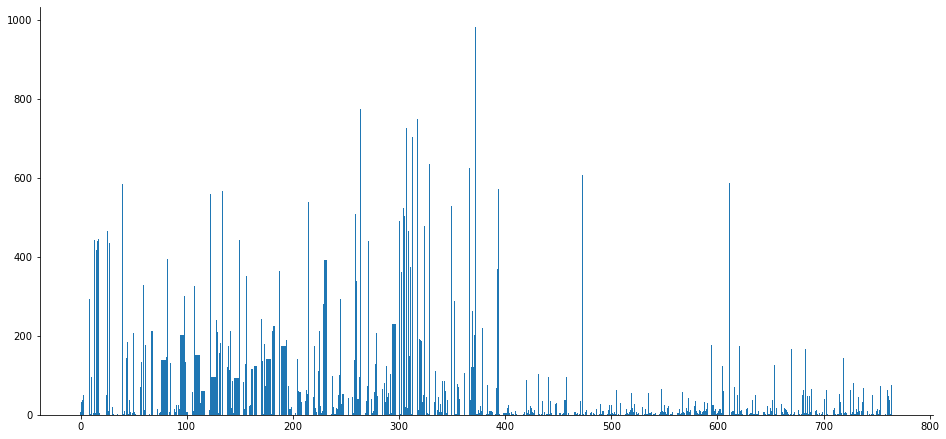

In [891]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# 5. Build model

In [285]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import xgboost
from xgboost import XGBRegressor

In [286]:
X_test_fs.shape

(8774, 778)

In [287]:
models = [LinearRegression(), Ridge()]
    
for model in models:
    lr = model
    lr.fit(X_train_fs, y_train)
    y_pred = lr.predict(X_val_fs)
    print("======================================")
    print(model)
    print("R-squared:", r2_score(y_val, y_pred))

LinearRegression()
R-squared: 0.17990865746528084
Ridge()
R-squared: 0.18181137621458154


In [315]:
evaluation = [(X_val_fs, y_val)]

xgb = XGBRegressor()
xgb.fit(X_train_fs, y_train, verbose=False)

y_pred = xgb.predict(X_val_fs)

In [316]:
print("R-squared:", r2_score(y_val, y_pred))

R-squared: 0.304378190007935


In [330]:
fi = xgb.feature_importances_
fi = fi * 100
n = 650
indx = np.argpartition(fi, -n)[-n:]
top_fi = fi[indx]

"""
fi_ = np.where(fi>0.5, fi, 0)
fi_ = np.nonzero(fi_)
fi_ = fi_[0].tolist()
print(len(fi_))
"""
print(len(fi),"---->>", len(top_fi))

778 ---->> 650


In [331]:
X_train_fi = X_train_fs.iloc[:, indx]
X_val_fi = X_val_fs.iloc[:, indx]
X_test_fi = X_test_fs.iloc[:, indx]

evaluation = [(X_val_fi, y_val)]

xgb_ = XGBRegressor(n_estimators=150,learning_rate=0.25)

xgb_.fit(X_train_fi, y_train, eval_set=evaluation, verbose=False)

y_pred = xgb_.predict(X_val_fi)

print("R-squared:", r2_score(y_val, y_pred))

R-squared: 0.3319249904409173


In [332]:
def custom_round(x, base=0.5):
    return base * round(float(x)/base)

vround = np.vectorize(custom_round)

In [333]:
y_pred_ = vround(xgb_.predict(X_test_fi))
len(y_pred_)

8774

In [337]:
X_test_fi.loc[:, "rating_num"] = 0
X_test_fi.loc[:, "rating_num"] = y_pred_

In [336]:
result = X_test_fi["rating_num"]
result.to_csv("Notebook/csv/Sevilla/result_2.csv")

> Tuning hyperparameters

In [338]:
#!pip install hyperopt

In [619]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from hyperopt.pyll.base import scope

#Define the space over which hyperopt will search for optimal hyperparameters.
space = {'max_depth': scope.int(hp.quniform("max_depth", 1, 5, 1)),
        'gamma': hp.uniform ('gamma', 0,1),
        'reg_alpha' : hp.uniform('reg_alpha', 0,50),
        'reg_lambda' : hp.uniform('reg_lambda', 10,100),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0,1),
        'min_child_weight' : hp.uniform('min_child_weight', 0, 5),
        'n_estimators': 150,
        'learning_rate': hp.uniform('learning_rate', 0.1, 0.5),
        'random_state': 32,
        'max_bin' : scope.int(hp.quniform('max_bin', 200, 550, 1))
        }

In [620]:
def objective(space):
    xgb=XGBRegressor(**space)
    
    evaluation = [(X_train_fi, y_train), (X_val_fi, y_val)]
    
    xgb.fit(X_train_fi, y_train,
            eval_set=evaluation,
            verbose=False)

    y_pred = xgb.predict(X_val_fi)
    
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    print ("SCORE:", rmse)
    
    #Specify what the loss is for each model.
    return {'loss':rmse, 'status': STATUS_OK, 'model': xgb}

In [621]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals=100,
                        trials = trials
                       )

SCORE:                                                                                                                 
1.6344643419383607                                                                                                     
SCORE:                                                                                                                 
1.5215509797964992                                                                                                     
SCORE:                                                                                                                 
1.6171020151014113                                                                                                     
SCORE:                                                                                                                 
1.6006428954998244                                                                                                     
SCORE:                                  

In [624]:
best_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

#Examine model hyperparameters
print(best_model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.7805763719946387, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=0.4688557121494644, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.32322329831814367, max_bin=357,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
             min_child_weight=4.089630589437734, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=32,
             reg_alpha=7.920620694460221, reg_lambda=30.47206759063701, ...)


In [625]:
xgb_ypred_best = best_model.predict(X_val_fi)
print('RMSE_Best_Model:', mean_squared_error(y_val, xgb_ypred_best, squared=False))
print('R2-score', r2_score(y_val, xgb_ypred_best))

RMSE_Best_Model: 1.4915330199894565
R2-score 0.32051780396826524


In [626]:
X_test_fi.loc[:,"rating_num"] = vround(best_model.predict(X_test_fi))

D:\Users\thanh_cv54t9u\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [627]:
result = X_test_fi["rating_num"]
result.to_csv("Notebook/csv/Sevilla/result_2.csv")